<a href="https://colab.research.google.com/github/oshiniM/DL-Lab01/blob/main/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

In [10]:
# Random 4x4 array from exponential distribution
np.random.seed(42)
scale = 1.0
arr4x4 = np.random.exponential(scale=scale, size=(4,4))

print("4x4 Exponential array:\n", arr4x4)
print("\nshape:", arr4x4.shape, " dtype:", arr4x4.dtype)
print("mean:", arr4x4.mean(), " std:", arr4x4.std())

4x4 Exponential array:
 [[0.46926809 3.01012143 1.31674569 0.91294255]
 [0.16962487 0.16959629 0.05983877 2.01123086]
 [0.91908215 1.23125006 0.02079931 3.50355748]
 [1.78642954 0.23868763 0.20067899 0.20261142]]

shape: (4, 4)  dtype: float64
mean: 1.0139040713972627  std: 1.044991963547608


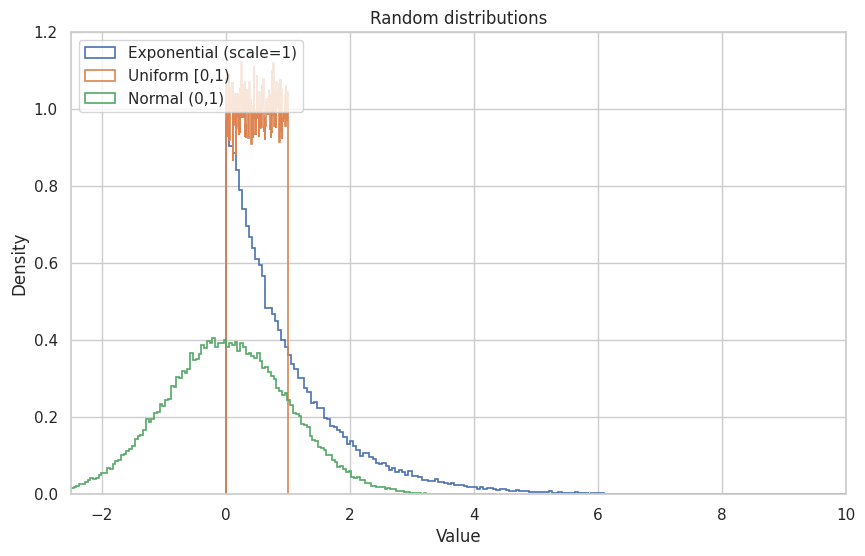

In [17]:
np.random.seed(123)
n = 100000
exp_data = np.random.exponential(scale=scale, size=n)
uniform_data = np.random.rand(n)
normal_data = np.random.normal(loc=0, scale=1, size=n)

plt.figure(figsize=(10,6))
bins = 200

plt.hist(exp_data, density=True, bins=bins, histtype="step", label="Exponential (scale=1)", linewidth=1.2)
plt.hist(uniform_data, density=True, bins=bins, histtype="step", label="Uniform [0,1)", linewidth=1.2)
plt.hist(normal_data, density=True, bins=bins, histtype="step", label="Normal (0,1)", linewidth=1.2)

plt.xlim(-2.5, 10)
plt.ylim(0, 1.2)
plt.legend(loc="upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

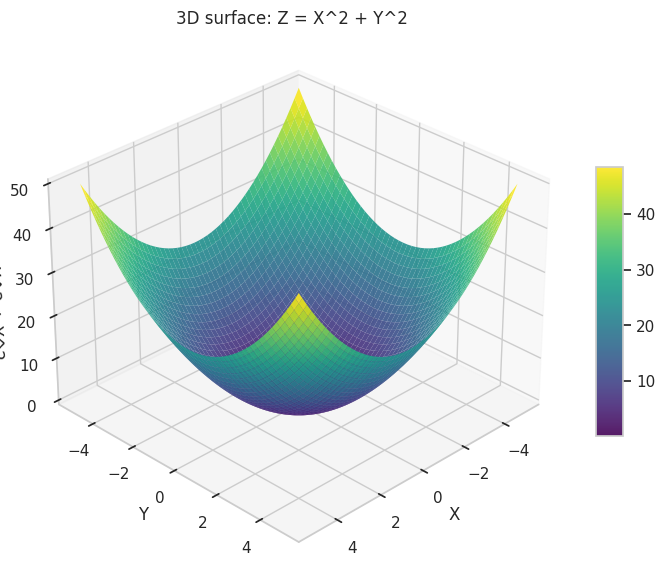

In [18]:
# 3D plot of Z = X^2 + Y^2

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

grid_n = 200
x = np.linspace(-5, 5, grid_n)
y = np.linspace(-5, 5, grid_n)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = X^2 + Y^2')
ax.set_title('3D surface: Z = X^2 + Y^2')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(elev=30, azim=45)
plt.show()

Pearson correlation:
             HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
HP       1.000   0.307    0.120    0.237    0.491 -0.041
Attack   0.307   1.000    0.492    0.146    0.369  0.195
Defense  0.120   0.492    1.000    0.188    0.140 -0.053
Sp. Atk  0.237   0.146    0.188    1.000    0.523  0.412
Sp. Def  0.491   0.369    0.140    0.523    1.000  0.393
Speed   -0.041   0.195   -0.053    0.412    0.393  1.000

Spearman correlation:
             HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
HP       1.000   0.539    0.390    0.364    0.567  0.054
Attack   0.539   1.000    0.542    0.162    0.386  0.227
Defense  0.390   0.542    1.000    0.259    0.250 -0.033
Sp. Atk  0.364   0.162    0.259    1.000    0.562  0.385
Sp. Def  0.567   0.386    0.250    0.562    1.000  0.404
Speed    0.054   0.227   -0.033    0.385    0.404  1.000


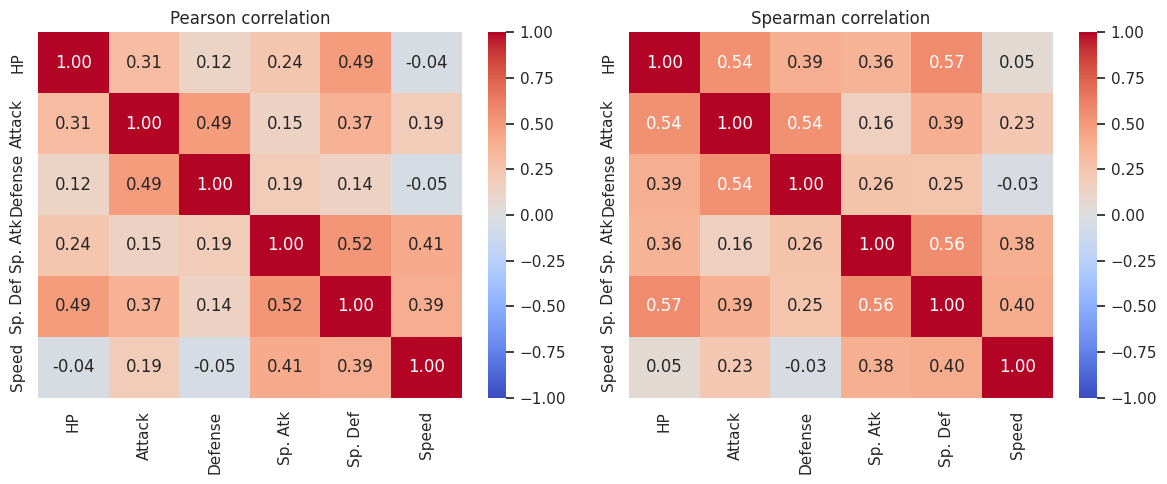

In [20]:
# Correlations and Heatmaps

!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

sub = df[features].dropna()

pearson_corr = sub.corr(method='pearson')
spearman_corr = sub.corr(method='spearman')

print("Pearson correlation:\n", pearson_corr.round(3))
print("\nSpearman correlation:\n", spearman_corr.round(3))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson correlation')

plt.subplot(1,2,2)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman correlation')

plt.tight_layout()
plt.show()